# 06_mean_sd_tail_index_tasset_consecutive19-11

In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

The imported sample is constructed with the strategy that picking up the US firm with firm-size (total asset) data consecutively from 2019 to 2011. For details, please see the file ``05``.

In [2]:
df, df2, df3, df4 = fq.dataprocess(file='data/US_asset.csv', var1='logtasset', var2='tasset', var3='tasset_mean')

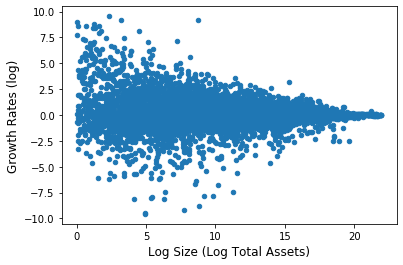

In [3]:
fq.scatterplot(df, x='logtasset', y='fgrow_log', xlabel='Log Size (Log Total Assets)')

In [4]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(0.00895, 9.949, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(9.949, 11.46, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(11.46, 13.052, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(13.052, 21.952, closed='right') ]

In [5]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([ 0.08, -0.63,  7.78, ...,  0.06, -0.04,  0.06])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

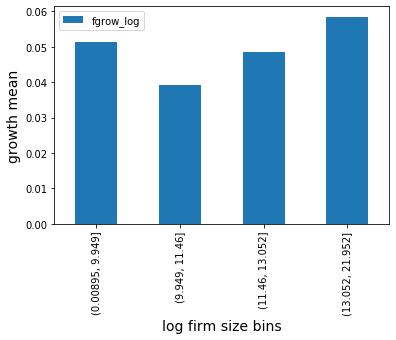

In [6]:
fq.plotbars(df3)

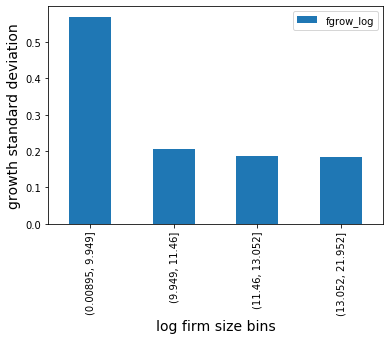

In [7]:
fq.plotbars(df4, ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [8]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [9]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

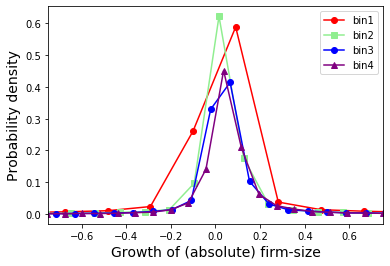

In [10]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

## 3.1 function

## 3.2 for pooled data

In [11]:
s_dist1 = df.tasset
s_dist2 = df.logtasset
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by total asset is

In [12]:
fq.gabaix_est(s_dist1, c=0.01)

1.2132436729338738

The tail index for log firm size distribution with firm size measured by total asset is

In [13]:
fq.gabaix_est(s_dist2, c=0.01)

23.704106252355835

The tail index for firm growth distribution with firm size measured by total asset is

In [14]:
fq.gabaix_est(s_dist3, c=0.01)

1.9488756595435657

## 3.3 tail index for firm size distribution yearly from 2010 to 2019

In [15]:
n = 2010
N = 2019
while n <= N:
    x = df[df['year'] == n].tasset
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 1.1635197976635656
Tail index in year 2012 is 1.1919568245043837
Tail index in year 2013 is 1.1903820799469944
Tail index in year 2014 is 1.1846334213472907
Tail index in year 2015 is 1.2076070976182005
Tail index in year 2016 is 1.224215742417065
Tail index in year 2017 is 1.233434807603857
Tail index in year 2018 is 1.24719595981992
None in year 2019


## 3.4 tail index for log firm size distribution yearly from 2010 to 2019

In [16]:
n = 2010
N = 2019
while n <= N:
    x = df[df['year'] == n].logtasset
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 22.552202078097864
Tail index in year 2012 is 23.191658207146396
Tail index in year 2013 is 23.21487703235381
Tail index in year 2014 is 23.13640338855971
Tail index in year 2015 is 23.614988199918493
Tail index in year 2016 is 24.011076401062837
Tail index in year 2017 is 24.224880824510745
Tail index in year 2018 is 24.523224914924057
None in year 2019


## 3.5 tail index for firm growth distribution yearly from 2010 to 2019

In [17]:
n = 2010
N = 2019
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 2.0922902640147987
Tail index in year 2012 is 2.061852011598936
Tail index in year 2013 is 2.0381130501267832
Tail index in year 2014 is 1.8591142470461612
Tail index in year 2015 is 1.8827186511047322
Tail index in year 2016 is 1.7268390581214454
Tail index in year 2017 is 1.9521615197183597
Tail index in year 2018 is 2.028467827356934
None in year 2019
